<a href="https://colab.research.google.com/github/PraveenParashar/PPAI/blob/main/Machine_Learning_Telco_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats


In [5]:
# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

In [4]:
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [5]:
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [6]:
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
# pipeline
from sklearn.pipeline import Pipeline

In [8]:
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score


In [9]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# drop missing values
df.dropna(inplace=True)

# drop customerID
df.drop('customerID', axis=1, inplace=True)


In [14]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [15]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
# check missing value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

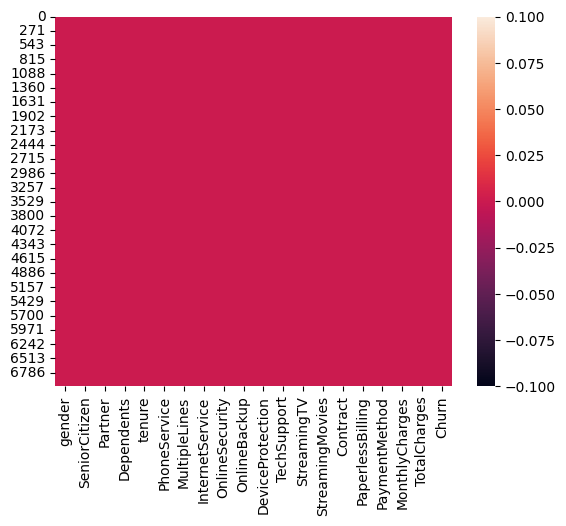

In [17]:
# heatmap for missing value
sns.heatmap(df.isnull())

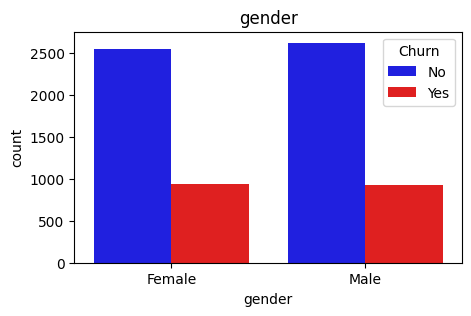

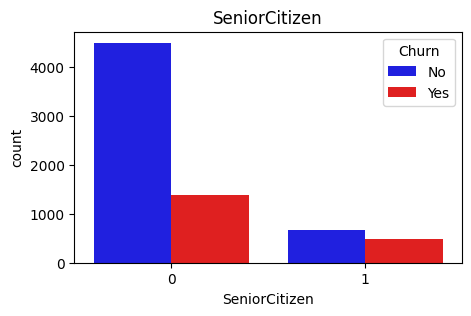

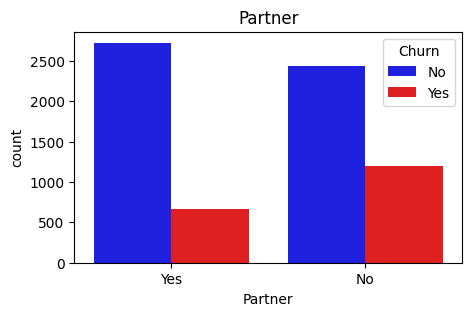

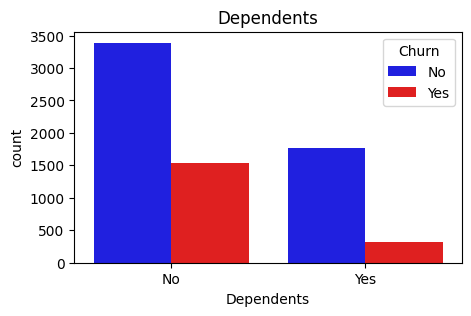

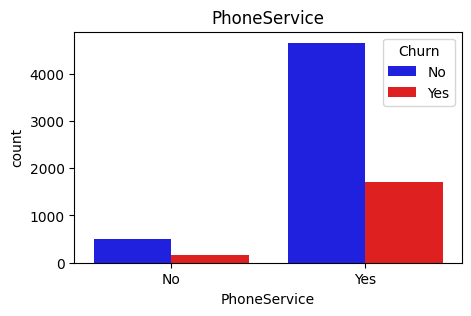

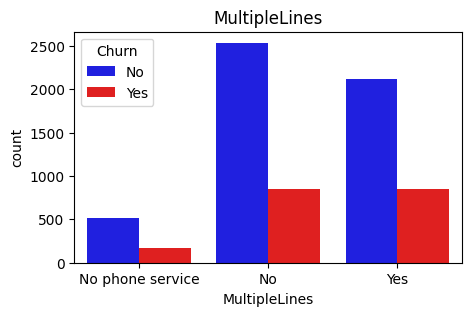

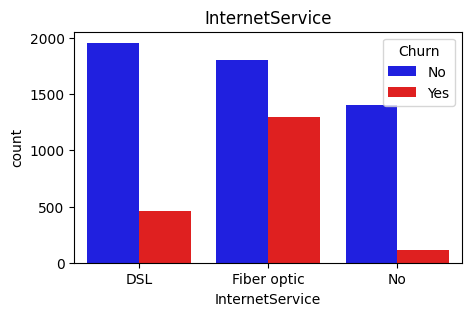

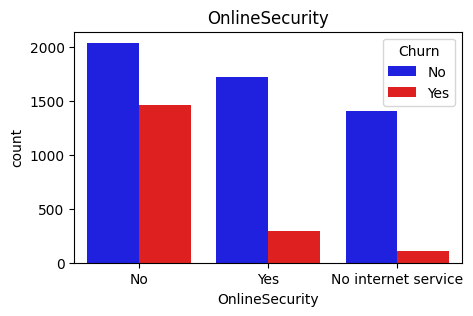

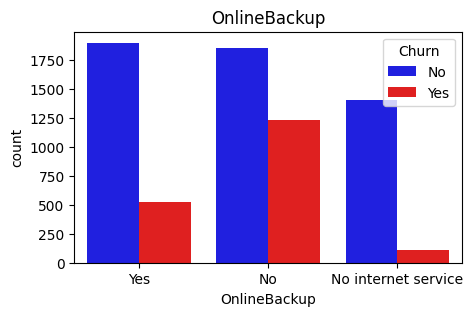

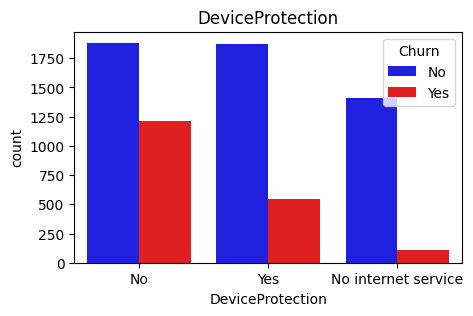

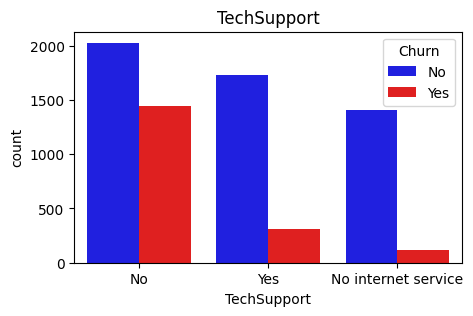

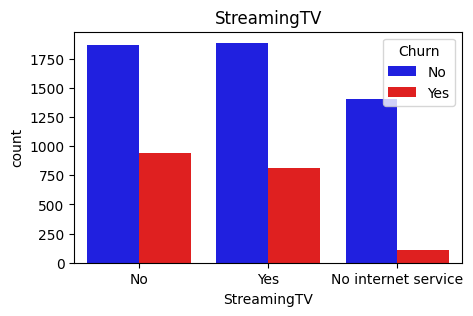

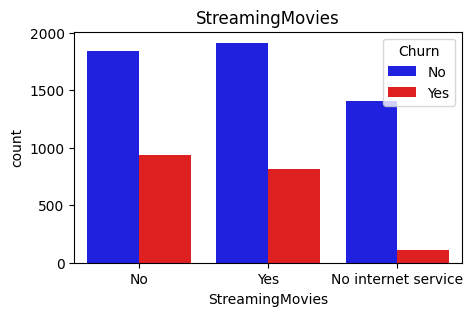

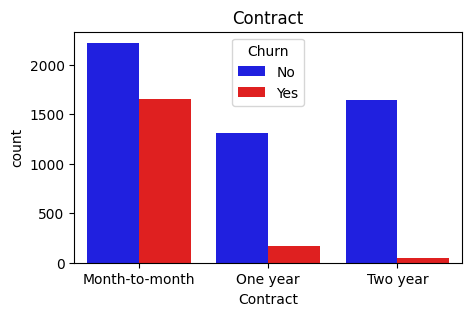

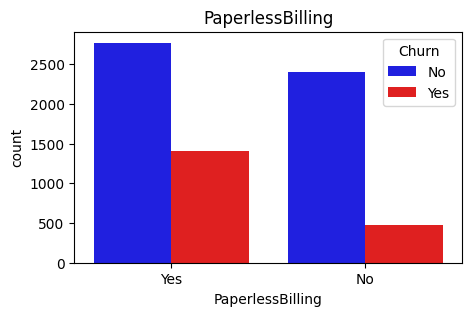

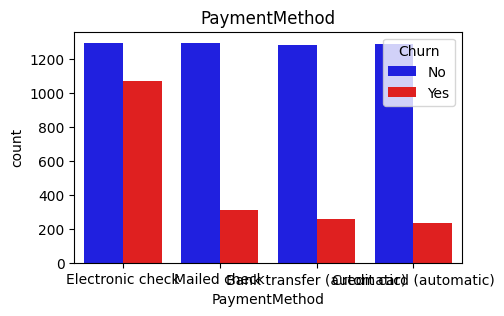

In [18]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

In [19]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [20]:
df.drop('Churn_No', axis=1, inplace=True)

In [3]:
df.head()

NameError: name 'df' is not defined

In [22]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [23]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

NameError: name 'RandomForestClassifier' is not defined

In [1]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined